In [148]:
import pandas as pd # type: ignore


<h1>Inkar data</h1>

In [180]:
inkar_2024 = pd.read_csv("../data/inkar_2024.csv",sep=";",decimal=",",dtype={'Kennziffer':str,'Kennziffer_EU':str,'Name':str}, low_memory=False)
inkar_2024.head()

,Bereich,ID,Kuerzel,Indikator,Raumbezug,Kennziffer,Name,Zeitbezug,Wert
0,Absolutzahlen,2176,alo,Arbeitslose,Arbeitsmarktregionen,001,Flensburg,1995,10494.0
1,Absolutzahlen,2176,alo,Arbeitslose,Arbeitsmarktregionen,001,Flensburg,1996,11921.0
2,Absolutzahlen,2176,alo,Arbeitslose,Arbeitsmarktregionen,001,Flensburg,1997,13213.0
3,Absolutzahlen,2176,alo,Arbeitslose,Arbeitsmarktregionen,001,Flensburg,1998,13301.0
4,Absolutzahlen,2176,alo,Arbeitslose,Arbeitsmarktregionen,001,Flensburg,1999,12048.0


In [149]:
inkar = pd.read_csv("../data/inkar_2022.csv",sep=";",decimal=",",dtype={'Kennziffer':str,'Kennziffer_EU':str,'Name':str}, low_memory=False)
inkar.head()

,Bereich,ID,Indikator,Raumbezug,Kennziffer,Name,Zeitbezug,Wert
0,Absolutzahlen,2176,Arbeitslose,Arbeitsmarktregionen,001,Flensburg,1995,10494.0
1,Absolutzahlen,2176,Arbeitslose,Arbeitsmarktregionen,001,Flensburg,1996,11921.0
2,Absolutzahlen,2176,Arbeitslose,Arbeitsmarktregionen,001,Flensburg,1997,13213.0
3,Absolutzahlen,2176,Arbeitslose,Arbeitsmarktregionen,001,Flensburg,1998,13301.0
4,Absolutzahlen,2176,Arbeitslose,Arbeitsmarktregionen,001,Flensburg,1999,12048.0


In [150]:
raumbezug = ['Bund', 'Bundesländer', 'Regierungsbezirke', 'Kreise', 'Gemeinden']
indikator = ["Bevölkerung gesamt"]

data = inkar[inkar['Zeitbezug'] == 2020]
data = data[data['Raumbezug'].isin(raumbezug)]
data = data[data['Indikator'].isin(indikator)]

data

,Bereich,ID,Indikator,Raumbezug,Kennziffer,Name,Zeitbezug,Wert
742188,Absolutzahlen,12586,Bevölkerung gesamt,Bund,111,Bundesrepublik Deutschland,2020,83155031.0
742214,Absolutzahlen,12586,Bevölkerung gesamt,Bundesländer,01,Schleswig-Holstein,2020,2910875.0
742240,Absolutzahlen,12586,Bevölkerung gesamt,Bundesländer,02,Hamburg,2020,1852478.0
742266,Absolutzahlen,12586,Bevölkerung gesamt,Bundesländer,03,Niedersachsen,2020,8003421.0
742292,Absolutzahlen,12586,Bevölkerung gesamt,Bundesländer,04,Bremen,2020,680130.0
...,...,...,...,...,...,...,...,...
889400,Absolutzahlen,12586,Bevölkerung gesamt,Regierungsbezirke,120,Brandenburg,2020,2531071.0
889426,Absolutzahlen,12586,Bevölkerung gesamt,Regierungsbezirke,130,Mecklenburg-Vorpommern,2020,1610774.0
889452,Absolutzahlen,12586,Bevölkerung gesamt,Regierungsbezirke,140,Sachsen,2020,4056941.0
889478,Absolutzahlen,12586,Bevölkerung gesamt,Regierungsbezirke,150,Sachsen-Anhalt,2020,2180684.0


In [151]:
columns = ['Land', 'Ebene', 'Wert']
cross_border_atlas = pd.DataFrame(columns=columns)
cross_border_atlas['Ebene'] = data['Raumbezug']
cross_border_atlas['Wert'] = data['Wert']
cross_border_atlas['Land'] = cross_border_atlas['Land'].fillna('DE')
cross_border_atlas

,Land,Ebene,Wert
742188,DE,Bund,83155031.0
742214,DE,Bundesländer,2910875.0
742240,DE,Bundesländer,1852478.0
742266,DE,Bundesländer,8003421.0
742292,DE,Bundesländer,680130.0
...,...,...,...
889400,DE,Regierungsbezirke,2531071.0
889426,DE,Regierungsbezirke,1610774.0
889452,DE,Regierungsbezirke,4056941.0
889478,DE,Regierungsbezirke,2180684.0


<h1>CBS data</h1>

In [152]:
import cbsodata

data_netherlands = pd.DataFrame(cbsodata.get_meta('37259ned', 'TypedDataSet'))

In [153]:
data_netherlands

,ID,Geslacht,RegioS,Perioden,BevolkingOp1Januari_1,Bevolkingsdichtheid_2,LevendGeborenKinderen_3,LevendGeborenKinderenRelatief_4,Overledenen_5,OverledenenRelatief_6,...,UitAndereGemeente_11,TotaalVertrekInclusiefCorrecties_12,TotaalVertrekInclusiefCoRelatief_13,EmigratieInclusiefAdministratieveC_14,SaldoAdministratieveCorrecties_15,NaarAndereGemeente_16,VestigingsoverschotInclusiefCorrecties_17,TotaleGroei_18,TotaleGroeiRelatief_19,BevolkingOp31December_20
0,0,T001038,NL01,1942JJ00,9007722.0,NaN,189975.0,21.0,86040.0,9.5,...,NaN,489617.0,54.1,NaN,NaN,NaN,-35407.0,68528.0,7.6,9076250.0
1,1,T001038,NL01,1943JJ00,9076250.0,NaN,209379.0,23.0,91438.0,10.0,...,NaN,559446.0,61.5,NaN,NaN,NaN,-65621.0,52320.0,5.8,9128570.0
2,2,T001038,NL01,1944JJ00,9128570.0,NaN,219946.0,24.0,108087.0,11.8,...,NaN,433205.0,47.2,NaN,NaN,NaN,-20135.0,91724.0,10.0,9220294.0
3,3,T001038,NL01,1945JJ00,9220294.0,NaN,209607.0,22.6,141398.0,15.3,...,NaN,655380.0,70.8,NaN,NaN,NaN,15798.0,84007.0,9.1,9304301.0
4,4,T001038,NL01,1946JJ00,9304301.0,NaN,284456.0,30.2,80151.0,8.5,...,NaN,695215.0,73.8,NaN,NaN,NaN,34053.0,238358.0,25.6,9542659.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319057,319057,4000,GM0999,2019JJ00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319058,319058,4000,GM0999,2020JJ00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319059,319059,4000,GM0999,2021JJ00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319060,319060,4000,GM0999,2022JJ00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
data_nl = data_netherlands[['Geslacht', 'RegioS','Perioden','BevolkingOp1Januari_1']]
data_nl = data_nl[data_nl['Geslacht'] == "T001038"]

data_nl = data_nl[data_nl['Perioden'] == '2020JJ00']
data_nl['Perioden'] = data_nl['Perioden'].str.extract(r'(\d{4})')

data_nl['RegioS'] = data_nl['RegioS'].str.strip()
data_nl['RegioS'] = data_nl['RegioS'].replace(r'^NL.*', 'Land', regex=True)
data_nl['RegioS'] = data_nl['RegioS'].replace(r'^LD.*', 'Landsdelen', regex=True)
data_nl['RegioS'] = data_nl['RegioS'].replace(r'^PV.*', 'Provincies', regex=True)
data_nl['RegioS'] = data_nl['RegioS'].replace(r'^CR.*', 'COROP', regex=True)
data_nl['RegioS'] = data_nl['RegioS'].replace(r'^GM.*', 'Gemeenten', regex=True)

data_nl = data_nl.dropna()

data_nl


,Geslacht,RegioS,Perioden,BevolkingOp1Januari_1
78,T001038,Land,2020,17407585.0
160,T001038,Landsdelen,2020,1729505.0
242,T001038,Landsdelen,2020,3671379.0
324,T001038,Landsdelen,2020,8326545.0
406,T001038,Landsdelen,2020,3680156.0
...,...,...,...,...
105366,T001038,Gemeenten,2020,21829.0
105448,T001038,Gemeenten,2020,47934.0
105776,T001038,Gemeenten,2020,22685.0
106022,T001038,Gemeenten,2020,44737.0


In [155]:
columns = ['Land', 'Ebene', 'Wert']
cross_border_atlas_2 = pd.DataFrame(columns=columns)
cross_border_atlas_2['Ebene'] = data_nl['RegioS']
cross_border_atlas_2['Wert'] = data_nl['BevolkingOp1Januari_1']
cross_border_atlas_2['Land'] = cross_border_atlas_2['Land'].fillna('NL')
cross_border_atlas_2

,Land,Ebene,Wert
78,NL,Land,17407585.0
160,NL,Landsdelen,1729505.0
242,NL,Landsdelen,3671379.0
324,NL,Landsdelen,8326545.0
406,NL,Landsdelen,3680156.0
...,...,...,...
105366,NL,Gemeenten,21829.0
105448,NL,Gemeenten,47934.0
105776,NL,Gemeenten,22685.0
106022,NL,Gemeenten,44737.0


<h1>Concat both dataframes</h1>

In [156]:
#cross_border_atlas
cross_border_atlas_2

,Land,Ebene,Wert
78,NL,Land,17407585.0
160,NL,Landsdelen,1729505.0
242,NL,Landsdelen,3671379.0
324,NL,Landsdelen,8326545.0
406,NL,Landsdelen,3680156.0
...,...,...,...
105366,NL,Gemeenten,21829.0
105448,NL,Gemeenten,47934.0
105776,NL,Gemeenten,22685.0
106022,NL,Gemeenten,44737.0


In [157]:
cross_border_atlas_final = pd.concat([cross_border_atlas, cross_border_atlas_2], axis=0)
cross_border_atlas_final
#cross_border_atlas_final.to_csv("cross_border_atlas.csv", index=False)

,Land,Ebene,Wert
742188,DE,Bund,83155031.0
742214,DE,Bundesländer,2910875.0
742240,DE,Bundesländer,1852478.0
742266,DE,Bundesländer,8003421.0
742292,DE,Bundesländer,680130.0
...,...,...,...
105366,NL,Gemeenten,21829.0
105448,NL,Gemeenten,47934.0
105776,NL,Gemeenten,22685.0
106022,NL,Gemeenten,44737.0


In [158]:
# cross border atlas ohne Länder

cross_border_atlas_ohneLänder = cross_border_atlas_final[cross_border_atlas_final["Ebene"] != "Bund"]
cross_border_atlas_ohneLänder = cross_border_atlas_ohneLänder[cross_border_atlas_ohneLänder['Ebene'] != "Land"]
cross_border_atlas_ohneLänder

,Land,Ebene,Wert
742214,DE,Bundesländer,2910875.0
742240,DE,Bundesländer,1852478.0
742266,DE,Bundesländer,8003421.0
742292,DE,Bundesländer,680130.0
742318,DE,Bundesländer,17925570.0
...,...,...,...
105366,NL,Gemeenten,21829.0
105448,NL,Gemeenten,47934.0
105776,NL,Gemeenten,22685.0
106022,NL,Gemeenten,44737.0


<h1>Graphs with seaborn</h1>

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


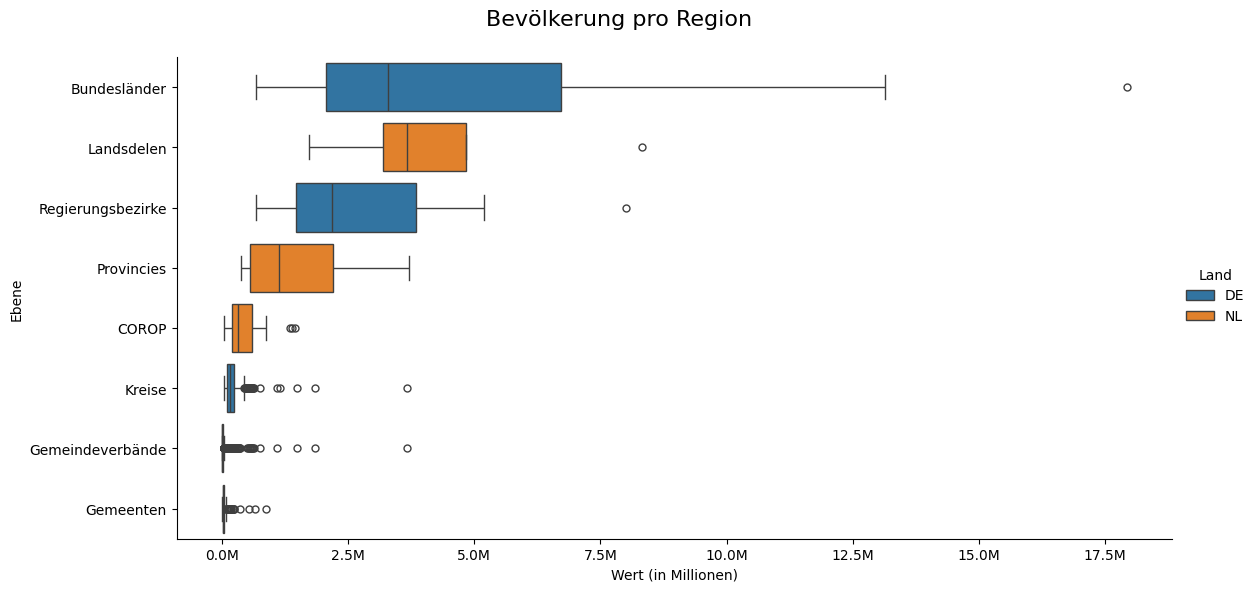

In [177]:
order = ["Bundesländer", "Landsdelen", "Regierungsbezirke", "Provincies", "COROP", "Kreise", "Gemeindeverbände", "Gemeenten"]
cross_border_atlas_ohneLänder['Ebene'] = pd.Categorical(cross_border_atlas_ohneLänder['Ebene'], categories=order, ordered=True)
cross_border_atlas_sorted_custom = cross_border_atlas_ohneLänder.sort_values(by="Ebene")

g = sns.catplot(data=cross_border_atlas_sorted_custom, 
                x="Wert", 
                y="Ebene", 
                hue="Land",  
                kind="box", 
                height=6, 
                aspect=2)

g.ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
g.set_axis_labels("Wert (in Millionen)", "Ebene")

g.fig.suptitle('Bevölkerung pro Region', fontsize=16)
g.fig.subplots_adjust(top=0.9) 

plt.show()

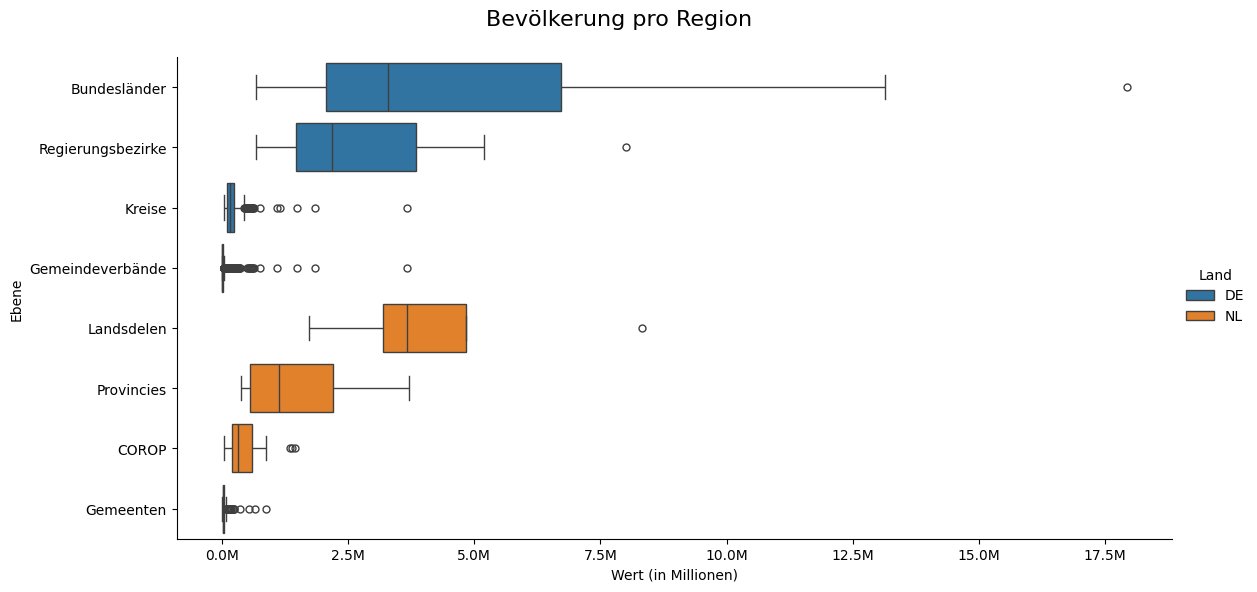

In [161]:
custom_order = ["Bundesländer", "Regierungsbezirke", "Kreise", "Gemeindeverbände", "Landsdelen", "Provincies", "COROP", "Gemeenten"]  
cross_border_atlas_ohneLänder['Ebene'] = pd.Categorical(cross_border_atlas_ohneLänder['Ebene'], categories=custom_order, ordered=True)
cross_border_atlas_sorted_custom = cross_border_atlas_ohneLänder.sort_values(by="Ebene")

g = sns.catplot(data=cross_border_atlas_sorted_custom, 
                x="Wert", 
                y="Ebene", 
                hue="Land",  
                kind="box", 
                height=6, 
                aspect=2)

g.ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
g.set_axis_labels("Wert (in Millionen)", "Ebene")

g.fig.suptitle('Bevölkerung pro Region', fontsize=16)
g.fig.subplots_adjust(top=0.9) 

plt.show()

<h1>Area for Germany and Netherlands</h1>

In [162]:
import geopandas as gpd
from shapely.geometry import shape

def calculate_area(multipolygon):
    poly = shape(multipolygon)
    area_m2 = poly.area
    area_km2 = area_m2 / 1_000_000
    return round(area_km2, 2)

In [163]:
gemeente_area = gpd.read_file(filename='GeoJSON:https://service.pdok.nl/cbs/gebiedsindelingen/2021/wfs/v1_0?request=GetFeature&service=WFS&version=1.1.0&outputFormat=json&typeName=gebiedsindelingen:gemeente_gegeneraliseerd', engine="pyogrio")
gemeente_area = gemeente_area[['statcode', 'statnaam', 'geometry']]

In [164]:
provincies_area = gpd.read_file(filename='GeoJSON:https://service.pdok.nl/cbs/gebiedsindelingen/2021/wfs/v1_0?request=GetFeature&service=WFS&version=1.1.0&outputFormat=json&typeName=gebiedsindelingen:provincie_gegeneraliseerd', engine="pyogrio")
provincies_area = provincies_area[['statcode', 'statnaam', 'geometry']]

In [165]:
corop_area = gpd.read_file(filename='GeoJSON:https://service.pdok.nl/cbs/gebiedsindelingen/2021/wfs/v1_0?request=GetFeature&service=WFS&version=1.1.0&outputFormat=json&typeName=gebiedsindelingen:coropgebied_gegeneraliseerd', engine="pyogrio")
corop_area = corop_area[['statcode', 'statnaam', 'geometry']]

In [166]:
landsdelen_area = gpd.read_file(filename='GeoJSON:https://service.pdok.nl/cbs/gebiedsindelingen/2021/wfs/v1_0?request=GetFeature&service=WFS&version=1.1.0&outputFormat=json&typeName=gebiedsindelingen:landsdeel_gegeneraliseerd', engine="pyogrio")
landsdelen_area = landsdelen_area[['statcode', 'statnaam', 'geometry']]

In [167]:
# alle zusammenfügen von der niederlande
area_nl = pd.concat([landsdelen_area, provincies_area, corop_area, gemeente_area], axis=0)

area_nl['statcode'] = area_nl['statcode'].str.strip()
area_nl['statcode'] = area_nl['statcode'].replace(r'^NL.*', 'Land', regex=True)
area_nl['statcode'] = area_nl['statcode'].replace(r'^LD.*', 'Landsdelen', regex=True)
area_nl['statcode'] = area_nl['statcode'].replace(r'^PV.*', 'Provincies', regex=True)
area_nl['statcode'] = area_nl['statcode'].replace(r'^CR.*', 'COROP', regex=True)
area_nl['statcode'] = area_nl['statcode'].replace(r'^GM.*', 'Gemeenten', regex=True)

area_nl['statnaam'] = area_nl['statnaam'] = ('NL')
area_nl['geometry'] = area_nl['geometry'].apply(calculate_area)


area_nl = area_nl[['statnaam', 'statcode', 'geometry']]
area_nl = area_nl.rename(columns={'geometry' : 'Wert', 'statcode' : 'Ebene', 'statnaam' : 'Land'})

area_nl

c:\Users\juliu\VSCODE\VSCODE\inkar-indicators\.venv\lib\site-packages\geopandas\geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


,Land,Ebene,Wert
0,NL,Landsdelen,8604.76
1,NL,Landsdelen,9993.06
2,NL,Landsdelen,9223.35
3,NL,Landsdelen,7263.47
0,NL,Provincies,2393.23
...,...,...,...
347,NL,Gemeenten,487.71
348,NL,Gemeenten,368.86
349,NL,Gemeenten,382.37
350,NL,Gemeenten,191.59


In [168]:
gemeinde_area = gpd.read_file(filename='../data/DE_VG250.gpkg', layer="vg250_gem",engine="pyogrio")
gemeinde_area['area'] = gemeinde_area['geometry'].apply(calculate_area)
gemeinde_area['Ebene'] = gemeinde_area['Ebene'] = "Gemeinde"

In [169]:
kreis_area = gpd.read_file(filename='../data/DE_VG250.gpkg', layer="vg250_krs",engine="pyogrio")
kreis_area['area'] = kreis_area['geometry'].apply(calculate_area)
kreis_area['Ebene'] = kreis_area['Ebene'] = "Kreise"

In [170]:
regierungsbezirk_area = gpd.read_file(filename='../data/DE_VG250.gpkg', layer="vg250_rbz",engine="pyogrio")
regierungsbezirk_area['area'] = regierungsbezirk_area['geometry'].apply(calculate_area)
regierungsbezirk_area['Ebene'] = regierungsbezirk_area['Ebene'] = "Regierungsbezirke"


In [171]:
bundesland_area = gpd.read_file(filename='../data/DE_VG250.gpkg', layer="vg250_lan",engine="pyogrio")
bundesland_area['area'] = bundesland_area['geometry'].apply(calculate_area)
bundesland_area['Ebene'] = bundesland_area['Ebene'] = "Bundesländer"

In [172]:
# alles zusammenfügen von den deutschen
area_de = pd.concat([bundesland_area, regierungsbezirk_area, kreis_area, gemeinde_area], axis=0)
area_de = area_de[['Ebene', 'area']]
area_de['Land'] = 'DE'
area_de = area_de[['Land', 'Ebene', 'area']]
area_de = area_de.rename(columns={'area' : 'Wert'})
area_de

,Land,Ebene,Wert
0,DE,Bundesländer,15614.14
1,DE,Bundesländer,742.04
2,DE,Bundesländer,47630.34
3,DE,Bundesländer,402.16
4,DE,Bundesländer,34094.95
...,...,...,...
11114,DE,Gemeinde,0.09
11115,DE,Gemeinde,0.06
11116,DE,Gemeinde,0.05
11117,DE,Gemeinde,0.08


In [173]:
# deuschte areas und niederlande areas zusammenfügen 
areas = pd.concat([area_de, area_nl], axis=0)
areas = areas.reset_index(drop=True)
areas

,Land,Ebene,Wert
0,DE,Bundesländer,15614.14
1,DE,Bundesländer,742.04
2,DE,Bundesländer,47630.34
3,DE,Bundesländer,402.16
4,DE,Bundesländer,34094.95
...,...,...,...
12007,NL,Gemeenten,487.71
12008,NL,Gemeenten,368.86
12009,NL,Gemeenten,382.37
12010,NL,Gemeenten,191.59


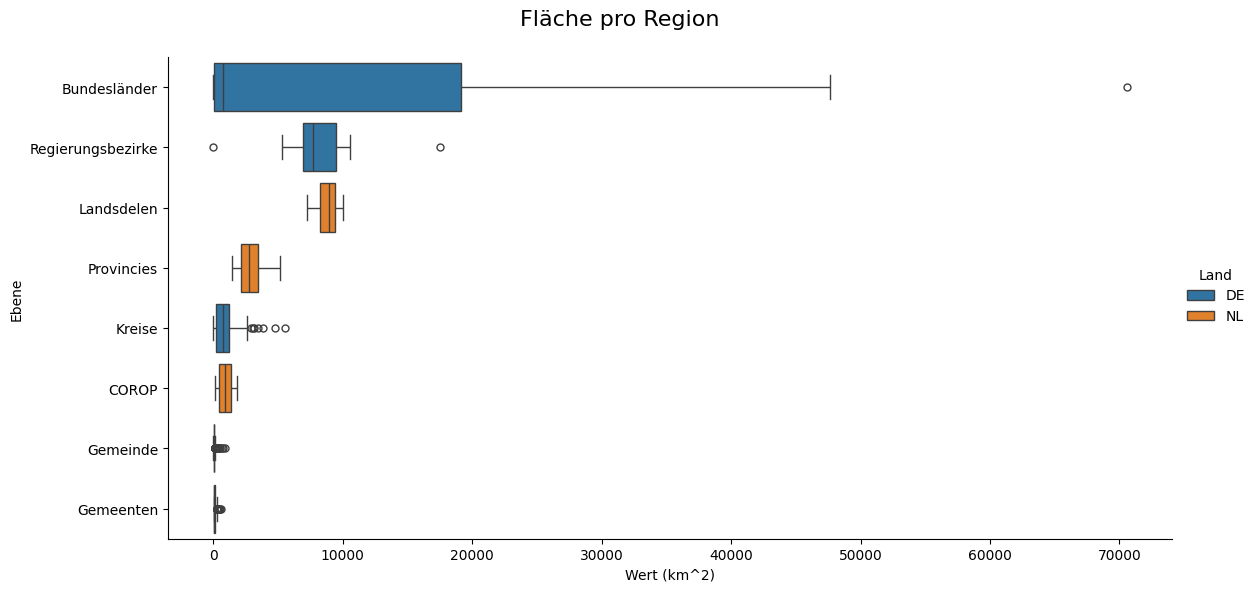

In [178]:
order_area = ["Bundesländer", "Regierungsbezirke", "Landsdelen", "Provincies", "Kreise", "COROP", "Gemeinde", "Gemeenten"]
areas['Ebene'] = pd.Categorical(areas['Ebene'], categories=order_area, ordered=True)
areas_sorted = areas.sort_values(by="Ebene")

g = sns.catplot(data=areas_sorted, 
                x="Wert", 
                y="Ebene", 
                hue="Land",  
                kind="box", 
                height=6, 
                aspect=2)

g.set_axis_labels("Fläche (km²)", "Ebene")

g.fig.suptitle('Fläche pro Region', fontsize=16)
g.fig.subplots_adjust(top=0.9) 

plt.show()

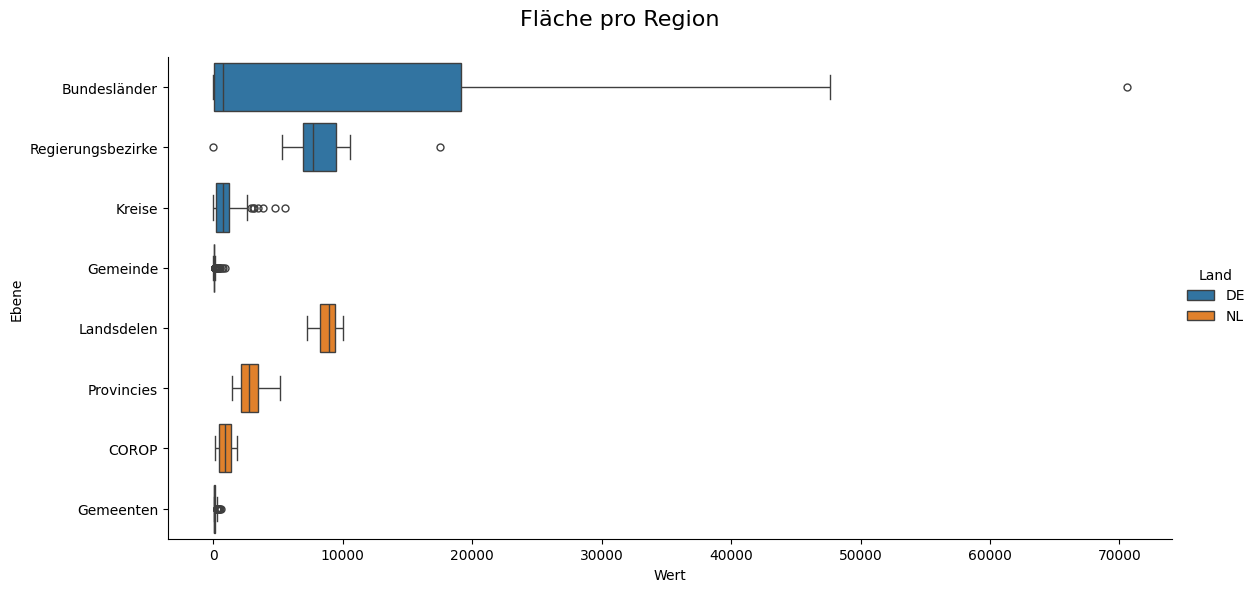

In [175]:
custom_order = ["Bundesländer", "Regierungsbezirke", "Kreise", "Gemeinde", "Landsdelen", "Provincies", "COROP", "Gemeenten"]  
areas['Ebene'] = pd.Categorical(areas['Ebene'], categories=custom_order, ordered=True)
areas = areas.sort_values(by="Ebene")

g = sns.catplot(data=areas, 
                x="Wert", 
                y="Ebene", 
                hue="Land",  
                kind="box", 
                height=6, 
                aspect=2)

g.set_axis_labels("Fläche (km²)", "Ebene")

g.fig.suptitle('Fläche pro Region', fontsize=16)
g.fig.subplots_adjust(top=0.9) 

plt.show()

<h1>Neue Grafiken mit 2024 Data<h1>

In [189]:
raumbezug = ['Bund', 'Bundesländer', 'Regierungsbezirke', 'Kreise', 'Gemeinden']
indikator = ["Bevölkerung gesamt"]

data_2024 = inkar_2024[inkar_2024['Zeitbezug'] == 2020]
data_2024 = data_2024[data_2024['Raumbezug'].isin(raumbezug)]
data_2024 = data_2024[data_2024['Indikator'].isin(indikator)]

columns = ['Land', 'Ebene', 'Wert']
cross_border_atlas_2024 = pd.DataFrame(columns=columns)
cross_border_atlas_2024['Ebene'] = data_2024['Raumbezug']
cross_border_atlas_2024['Wert'] = data_2024['Wert']
cross_border_atlas_2024['Land'] = cross_border_atlas_2024['Land'].fillna('DE')


data_nl = data_netherlands[['Geslacht', 'RegioS','Perioden','BevolkingOp1Januari_1']]
data_nl = data_nl[data_nl['Geslacht'] == "T001038"]

data_nl_2024 = pd.DataFrame(cbsodata.get_meta('37259ned', 'TypedDataSet'))
data_nl_2024 = data_nl_2024[data_nl_2024['Perioden'] == '2020JJ00']
data_nl_2024['Perioden'] = data_nl_2024['Perioden'].str.extract(r'(\d{4})')

data_nl_2024['RegioS'] = data_nl_2024['RegioS'].str.strip()
data_nl_2024['RegioS'] = data_nl_2024['RegioS'].replace(r'^NL.*', 'Land', regex=True)
data_nl_2024['RegioS'] = data_nl_2024['RegioS'].replace(r'^LD.*', 'Landsdelen', regex=True)
data_nl_2024['RegioS'] = data_nl_2024['RegioS'].replace(r'^PV.*', 'Provincies', regex=True)
data_nl_2024['RegioS'] = data_nl_2024['RegioS'].replace(r'^CR.*', 'COROP', regex=True)
data_nl_2024['RegioS'] = data_nl_2024['RegioS'].replace(r'^GM.*', 'Gemeenten', regex=True)

data_nl_2024 = data_nl_2024.dropna()

columns = ['Land', 'Ebene', 'Wert']
cross_border_atlas_nl_2024 = pd.DataFrame(columns=columns)
cross_border_atlas_nl_2024['Ebene'] = data_nl_2024['RegioS']
cross_border_atlas_nl_2024['Wert'] = data_nl_2024['BevolkingOp1Januari_1']
cross_border_atlas_nl_2024['Land'] = cross_border_atlas_nl_2024['Land'].fillna('NL')

cross_border_atlas_final_2024 = pd.concat([cross_border_atlas_2024, cross_border_atlas_nl_2024], axis=0)
cross_border_atlas_final_2024

,Land,Ebene,Wert
1961232,DE,Bund,83155031.0
1961260,DE,Bundesländer,2910875.0
1961288,DE,Bundesländer,1852478.0
1961316,DE,Bundesländer,8003421.0
1961344,DE,Bundesländer,680130.0
...,...,...,...
105366,NL,Gemeenten,21829.0
105448,NL,Gemeenten,47934.0
105776,NL,Gemeenten,22685.0
106022,NL,Gemeenten,44737.0


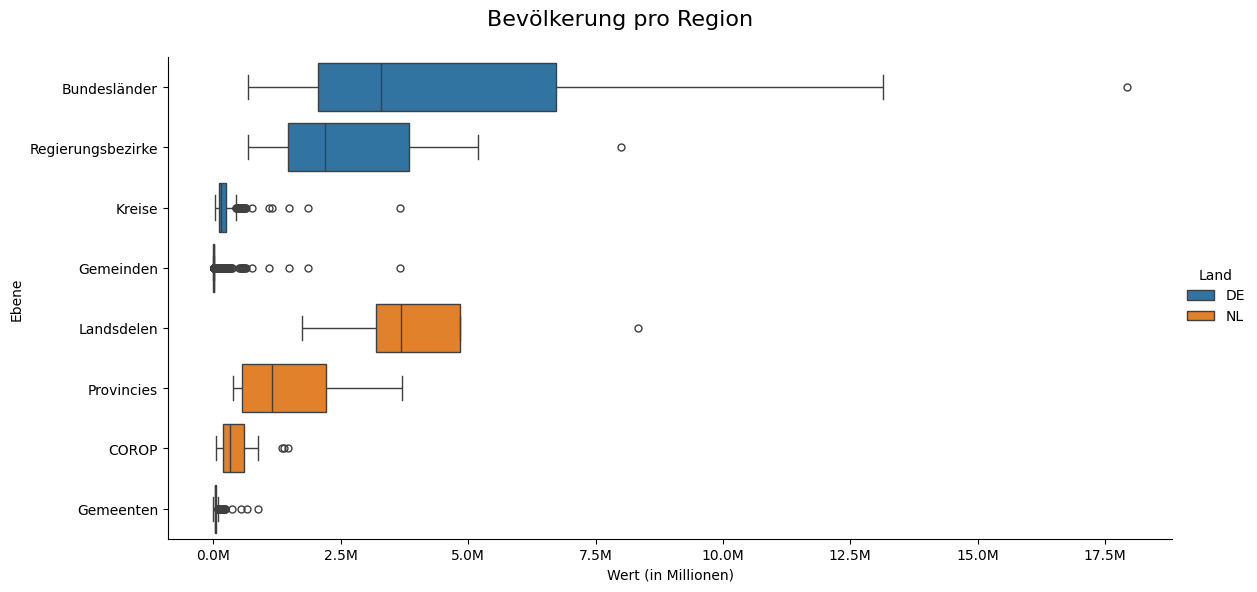

In [190]:
custom_order = ["Bundesländer", "Regierungsbezirke", "Kreise", "Gemeinden", "Landsdelen", "Provincies", "COROP", "Gemeenten"]  
cross_border_atlas_final_2024['Ebene'] = pd.Categorical(cross_border_atlas_final_2024['Ebene'], categories=custom_order, ordered=True)
cross_border_atlas_final_2024_sorted = cross_border_atlas_final_2024.sort_values(by="Ebene")

g = sns.catplot(data=cross_border_atlas_final_2024_sorted, 
                x="Wert", 
                y="Ebene", 
                hue="Land",  
                kind="box", 
                height=6, 
                aspect=2)

g.ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
g.set_axis_labels("Wert (in Millionen)", "Ebene")

g.fig.suptitle('Bevölkerung pro Region', fontsize=16)
g.fig.subplots_adjust(top=0.9) 

plt.show()

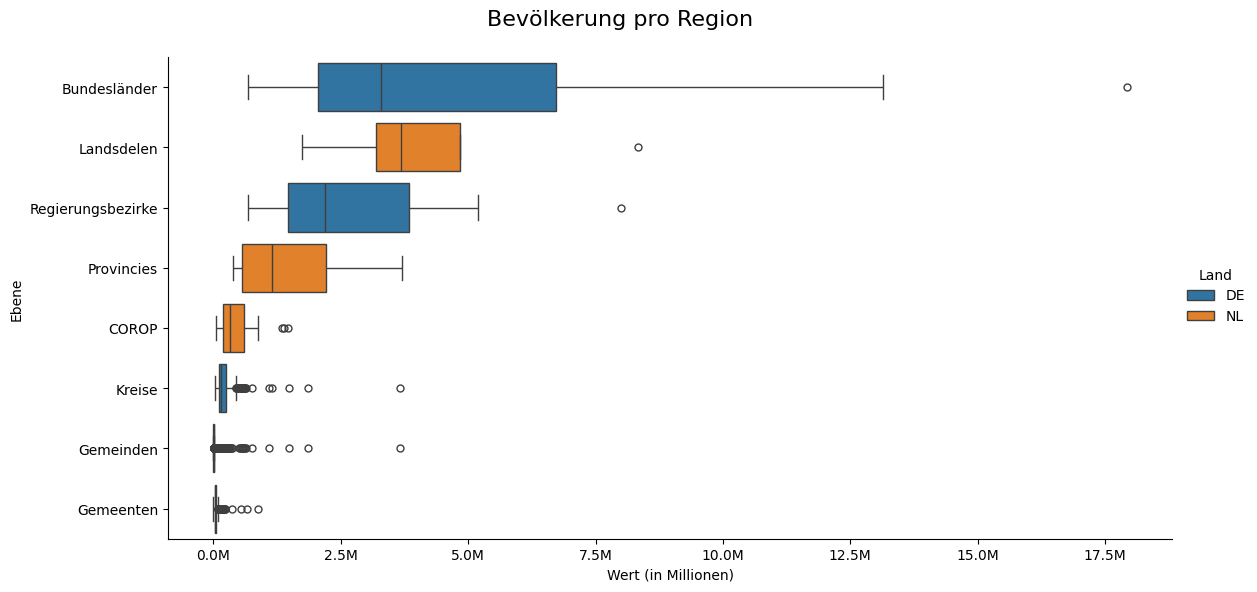

In [191]:
order = ["Bundesländer", "Landsdelen", "Regierungsbezirke", "Provincies", "COROP", "Kreise", "Gemeinden", "Gemeenten"]
cross_border_atlas_final_2024['Ebene'] = pd.Categorical(cross_border_atlas_final_2024['Ebene'], categories=order, ordered=True)
cross_border_atlas_final_2024_mixed = cross_border_atlas_final_2024.sort_values(by="Ebene")

g = sns.catplot(data=cross_border_atlas_final_2024_mixed, 
                x="Wert", 
                y="Ebene", 
                hue="Land",  
                kind="box", 
                height=6, 
                aspect=2)

g.ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
g.set_axis_labels("Wert (in Millionen)", "Ebene")

g.fig.suptitle('Bevölkerung pro Region', fontsize=16)
g.fig.subplots_adjust(top=0.9) 

plt.show()

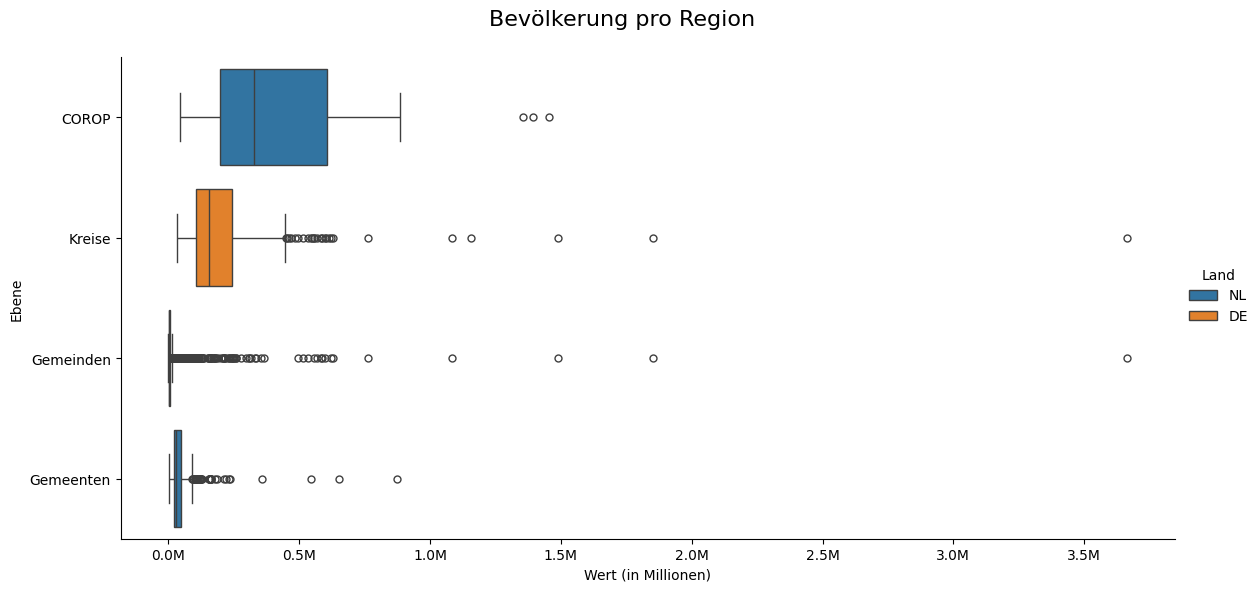

In [192]:
order = ["COROP", "Kreise", "Gemeinden", "Gemeenten"]
cross_border_atlas_final_2024['Ebene'] = pd.Categorical(cross_border_atlas_final_2024['Ebene'], categories=order, ordered=True)
cross_border_atlas_final_2024_sorted_stripped = cross_border_atlas_final_2024.sort_values(by="Ebene")

g = sns.catplot(data=cross_border_atlas_final_2024_sorted_stripped, 
                x="Wert", 
                y="Ebene", 
                hue="Land",  
                kind="box", 
                height=6, 
                aspect=2)

g.ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
g.set_axis_labels("Wert (in Millionen)", "Ebene")

g.fig.suptitle('Bevölkerung pro Region', fontsize=16)
g.fig.subplots_adjust(top=0.9) 

plt.show()